# **1. Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import kagglehub
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import joblib

# **2. Load the Dataset**

In [ ]:
path = kagglehub.dataset_download("amananandrai/ag-news-classification-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ag-news-classification-dataset' dataset.
Path to dataset files: /kaggle/input/ag-news-classification-dataset


In [ ]:
df = pd.read_csv(os.path.join(path, "train.csv"), names=['label', 'title', 'description'])
df.head()

,label,title,description
0,Class Index,Title,Description
1,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
2,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
3,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
4,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...


# **3. Inspect and Select Relevant Columns**

In [ ]:
df = df[['description', 'label']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120001 entries, 0 to 120000
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   description  120001 non-null  object
 1   label        120001 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


# **4. Handle Missing Values**

In [ ]:
df.dropna(inplace=True)

# **5. Text Preprocessing**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens)

In [ ]:
df['cleaned_text'] = df['description'].apply(preprocess_text)
df.head()

,description,label,cleaned_text
0,Description,Class Index,description
1,"Reuters - Short-sellers, Wall Street's dwindli...",3,reuters shortsellers wall streets dwindlingban...
2,Reuters - Private investment firm Carlyle Grou...,3,reuters private investment firm carlyle groupw...
3,Reuters - Soaring crude prices plus worries\ab...,3,reuters soaring crude prices plus worriesabout...
4,Reuters - Authorities have halted oil export\f...,3,reuters authorities halted oil exportflows mai...


# **6. Text Vectorization (TF-IDF)**

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

# **7. Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **8. Model Training**

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

# **9. Model Evaluation**

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.895754343569018
              precision    recall  f1-score   support

           1       0.90      0.89      0.90      6047
           2       0.94      0.97      0.96      5872
           3       0.87      0.86      0.86      6079
           4       0.86      0.87      0.87      6002
 Class Index       0.00      0.00      0.00         1

    accuracy                           0.90     24001
   macro avg       0.72      0.72      0.72     24001
weighted avg       0.90      0.90      0.90     24001



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Bouns (Visualization):**

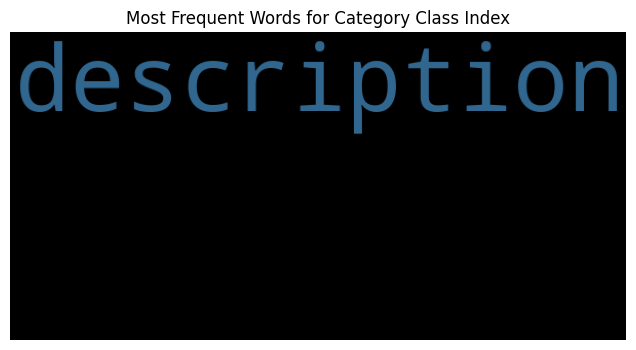

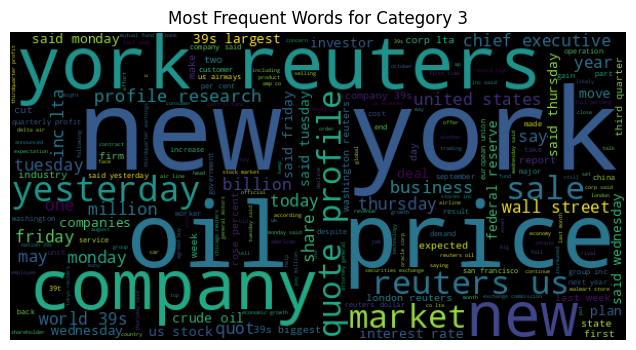

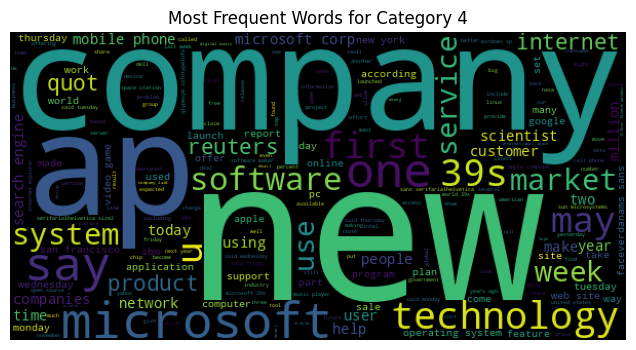

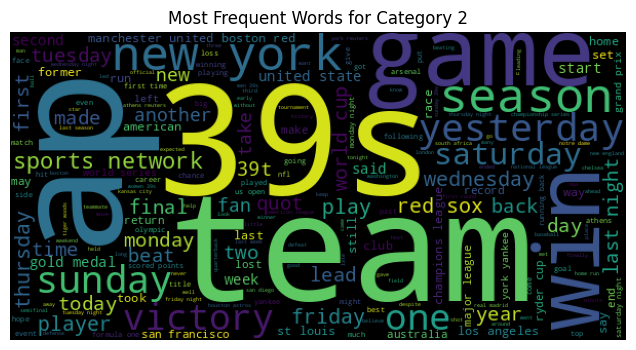

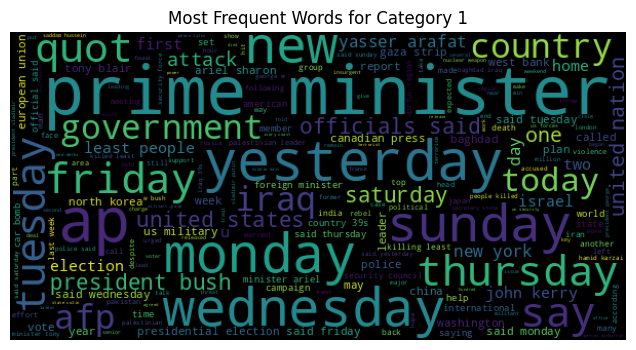

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for label_num in df['label'].unique():
    text = ' '.join(df[df['label'] == label_num]['cleaned_text'])
    plt.figure(figsize=(8,4))
    plt.imshow(WordCloud(width=600, height=300).generate(text))
    plt.title(f"Most Frequent Words for Category {label_num}")
    plt.axis('off')
    plt.show()

# **Save the Model and Vectorizer**

In [ ]:
joblib.dump(model, "news_classifier.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']